# Import software libraries

In [1]:
# Import required libraries.
import sys                          # Read system parameters.
import numpy as np                  # Work with multi-dimensional arrays.
import pandas as pd                 # Manipulate and analyze data.
import matplotlib                   # Create and format charts.
import matplotlib.pyplot as plt  
import seaborn as sns               # Make charting easier.
import warnings                                             # Suppress warnings.
warnings.filterwarnings('ignore')

# Summarize software libraries used.
print('Libraries used in this project:')
print('- NumPy {}'.format(np.__version__))
print('- Python {}'.format(sys.version))
print('- pandas {}'.format(pd.__version__))
print('- Matplotlib {}'.format(matplotlib.__version__))
print('- Seaborn {}'.format(sns.__version__))

Libraries used in this project:
- NumPy 1.19.5
- Python 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
- pandas 1.3.4
- Matplotlib 3.4.3
- Seaborn 0.11.2


# Read and examine the data

In [2]:
# Read the data that was put through the ETL process in Course 2 of the CDSP Specialization. 

df = pd.read_pickle("online_history_cleaned.pickle")

# Preview the first five rows of the data.

df.head()

,Invoice,StockCode,Quantity,InvoiceDate,Price,CustomerID,Country,TotalAmount,Description
0,536365,85123A,6,2010-12-01 08:26:00,2.55,u1785,United Kingdom,15.30,CREAM HANGING HEART T-LIGHT HOLDER
1,536367,84879,32,2010-12-01 08:34:00,1.69,u13047,United Kingdom,54.08,ASSORTED COLOUR BIRD ORNAMENT
2,536373,85123A,6,2010-12-01 09:02:00,2.55,u1785,United Kingdom,15.30,CREAM HANGING HEART T-LIGHT HOLDER
3,536375,85123A,6,2010-12-01 09:32:00,2.55,u1785,United Kingdom,15.30,CREAM HANGING HEART T-LIGHT HOLDER
4,536378,20725,10,2010-12-01 09:37:00,1.65,u14688,United Kingdom,16.50,LUNCH BAG RED RETROSPOT


In [3]:
# Get the shape of the data.

df.shape

(15206, 9)

In [4]:
# Get the data types for every column in the DataFrame.

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15206 entries, 0 to 17031
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Invoice      15206 non-null  object        
 1   StockCode    15206 non-null  object        
 2   Quantity     15206 non-null  int64         
 3   InvoiceDate  15206 non-null  datetime64[ns]
 4   Price        15194 non-null  float64       
 5   CustomerID   12435 non-null  object        
 6   Country      15206 non-null  object        
 7   TotalAmount  15194 non-null  float64       
 8   Description  15206 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 1.2+ MB


# Generate summary statistics for all of the data

In [5]:
# Get a DataFrame of summary statistics that describe the data, including mean, median, standard deviation, etc.
# Be sure to include all variables, including categorical ones.

df.describe(include='all')

,Invoice,StockCode,Quantity,InvoiceDate,Price,CustomerID,Country,TotalAmount,Description
count,15206,15206,15206.000000,15206,15194.000000,12435,15206,15194.000000,15206
unique,8315,10,NaN,8022,NaN,2473,1,NaN,10
top,536876,85123A,NaN,2011-05-10 15:07:00,NaN,u17841,United Kingdom,NaN,CREAM HANGING HEART T-LIGHT HOLDER
freq,10,2163,NaN,10,NaN,171,15206,NaN,2163
first,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2011-12-09 12:31:00,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,16.775483,NaN,4.164267,NaN,NaN,40.705153,NaN
std,NaN,NaN,79.496270,NaN,4.377605,NaN,NaN,132.142503,NaN
min,NaN,NaN,1.000000,NaN,0.400000,NaN,NaN,0.550000,NaN
25%,NaN,NaN,2.000000,NaN,1.650000,NaN,NaN,8.850000,NaN


# Plot a bar chart for the average price per item

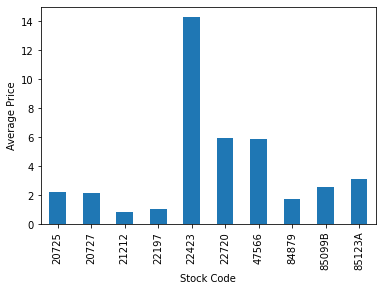

In [6]:
# Plot the average price per item using a bar chart.
# Make sure the average price is on one axis, and each distinct item description is on the other axis.

df.groupby(["StockCode"])["Price"].mean().plot(kind='bar')
plt.xlabel("Stock Code")
plt.ylabel("Average Price")
plt.show()

# Explore the distribution of the numeric variable `Price`

In [7]:
# Get a DataFrame of summary statistics for numeric variables only.

df.describe()

,Quantity,Price,TotalAmount
count,15206.000000,15194.000000,15194.000000
mean,16.775483,4.164267,40.705153
std,79.496270,4.377605,132.142503
min,1.000000,0.400000,0.550000
25%,2.000000,1.650000,8.850000
50%,6.000000,2.550000,16.500000
75%,12.000000,4.950000,30.360000
max,4300.000000,32.040000,4921.500000


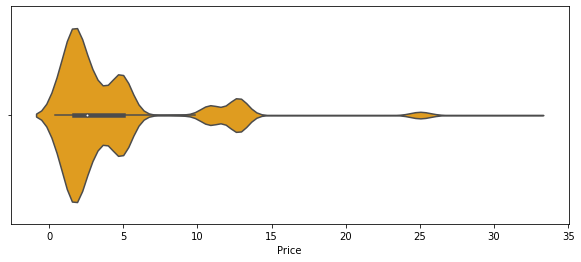

In [8]:
# Generate a violin plot for the "Price" variable.
# Decorate and style the plot however you think is best.
plt.figure(figsize=(10,4))
sns.violinplot(x="Price", data=df, color='orange')
plt.show()

# Visualize correlations between numeric variables

In [9]:
# Generate a correlation matrix between all numeric variables.

df.corr()

,Quantity,Price,TotalAmount
Quantity,1.000000,-0.088356,0.745641
Price,-0.088356,1.000000,0.109054
TotalAmount,0.745641,0.109054,1.000000


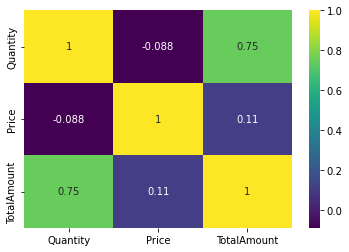

In [10]:
# Visualize the correlations with a heatmap.

sns.heatmap(data=df.corr(), annot=True, cmap='viridis')
plt.show()

# Transform skewed variables

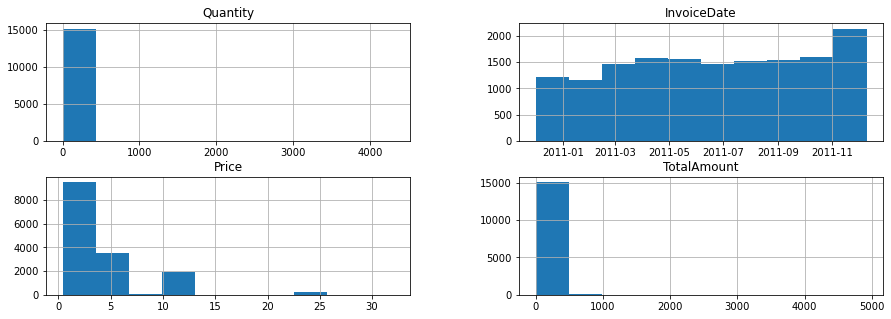

In [11]:
# Plot histograms for the original distributions of all numeric variables.

df.hist(figsize=(15,5))
plt.show()

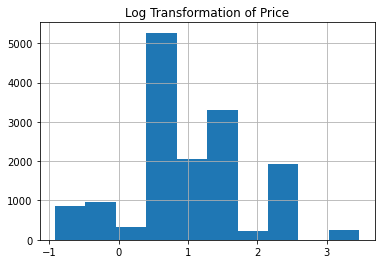

In [12]:
# Plot the log transformation of "Price".

np.log(df.Price).hist()
plt.title('Log Transformation of Price');

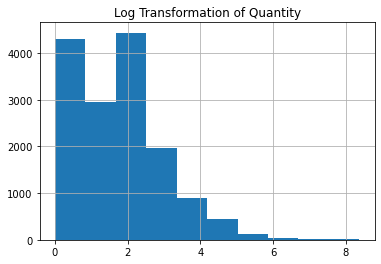

In [13]:
# Plot the log transformation of "Quantity".

np.log(df.Quantity).hist()
plt.title('Log Transformation of Quantity');

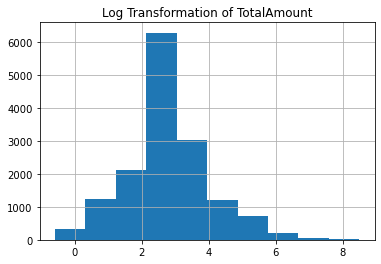

In [14]:
# Plot the log transformation of "TotalAmount".

np.log(df.TotalAmount).hist()
plt.title('Log Transformation of TotalAmount');


# Analyze time series data

In [15]:
# Obtain the number of invoices by month.

df["Month"] = df["InvoiceDate"].dt.month

# Print the number of invoices by month.

df.head()

,Invoice,StockCode,Quantity,InvoiceDate,Price,CustomerID,Country,TotalAmount,Description,Month
0,536365,85123A,6,2010-12-01 08:26:00,2.55,u1785,United Kingdom,15.30,CREAM HANGING HEART T-LIGHT HOLDER,12
1,536367,84879,32,2010-12-01 08:34:00,1.69,u13047,United Kingdom,54.08,ASSORTED COLOUR BIRD ORNAMENT,12
2,536373,85123A,6,2010-12-01 09:02:00,2.55,u1785,United Kingdom,15.30,CREAM HANGING HEART T-LIGHT HOLDER,12
3,536375,85123A,6,2010-12-01 09:32:00,2.55,u1785,United Kingdom,15.30,CREAM HANGING HEART T-LIGHT HOLDER,12
4,536378,20725,10,2010-12-01 09:37:00,1.65,u14688,United Kingdom,16.50,LUNCH BAG RED RETROSPOT,12


In [16]:
df.groupby(["Month"])["Invoice"].count()

Month
1      923
2      956
3     1345
4     1140
5     1384
6     1203
7     1227
8     1169
9     1378
10    1257
11    1726
12    1498
Name: Invoice, dtype: int64

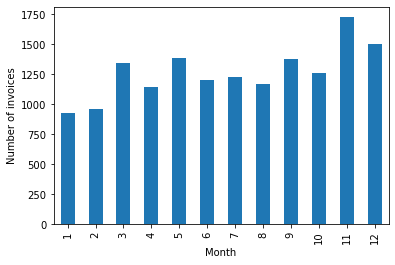

In [17]:
# Use a bar chart to plot the number of invoices by month.

df.groupby(["Month"])["Invoice"].count().plot(kind="bar")
plt.xlabel("Month")
plt.ylabel("Number of invoices")
plt.show()

# Identify and handle missing data

In [18]:
# Identify any missing data for all variables.

df.isnull().sum()

Invoice           0
StockCode         0
Quantity          0
InvoiceDate       0
Price            12
CustomerID     2771
Country           0
TotalAmount      12
Description       0
Month             0
dtype: int64

In [19]:
# Print the current shape of the data.

print(df.shape)

# Remove rows of data where "CustomerID" is unknown.



# Print the new shape of the data.



(15206, 10)


In [20]:
df.dropna(subset=["CustomerID"], inplace=True)

In [21]:
print(df.shape)

(12435, 10)


In [22]:
# Fill in N/A values for "Price" and "TotalAmount" with 0.

df.fillna(value=0, inplace=True)


# Confirm there are no longer any missing values.



In [23]:
df.isnull().sum()

Invoice        0
StockCode      0
Quantity       0
InvoiceDate    0
Price          0
CustomerID     0
Country        0
TotalAmount    0
Description    0
Month          0
dtype: int64

# One-hot encode the `Description` variable

In [24]:
# One-hot encode the "Description" variable with dummy variables for each unique description.
# Prefix each dummy variable name with "Description".

df.Description.unique()

# Preview the first five rows of the DataFrame.



array(['CREAM HANGING HEART T-LIGHT HOLDER',
       'ASSORTED COLOUR BIRD ORNAMENT', 'LUNCH BAG RED RETROSPOT',
       'PACK OF 72 RETROSPOT CAKE CASES', 'JUMBO BAG RED RETROSPOT',
       'POPCORN HOLDER', 'LUNCH BAG  BLACK SKULL.',
       'REGENCY CAKESTAND 3 TIER', 'PARTY BUNTING',
       'SET OF 3 CAKE TINS PANTRY DESIGN '], dtype=object)

In [25]:
df.reset_index(inplace=True, drop=True)

In [26]:
df

,Invoice,StockCode,Quantity,InvoiceDate,Price,CustomerID,Country,TotalAmount,Description,Month
0,536365,85123A,6,2010-12-01 08:26:00,2.55,u1785,United Kingdom,15.30,CREAM HANGING HEART T-LIGHT HOLDER,12
1,536367,84879,32,2010-12-01 08:34:00,1.69,u13047,United Kingdom,54.08,ASSORTED COLOUR BIRD ORNAMENT,12
2,536373,85123A,6,2010-12-01 09:02:00,2.55,u1785,United Kingdom,15.30,CREAM HANGING HEART T-LIGHT HOLDER,12
3,536375,85123A,6,2010-12-01 09:32:00,2.55,u1785,United Kingdom,15.30,CREAM HANGING HEART T-LIGHT HOLDER,12
4,536378,20725,10,2010-12-01 09:37:00,1.65,u14688,United Kingdom,16.50,LUNCH BAG RED RETROSPOT,12
...,...,...,...,...,...,...,...,...,...,...
12430,581538,20727,1,2011-12-09 11:34:00,1.65,u14446,United Kingdom,1.65,LUNCH BAG BLACK SKULL.,12
12431,581538,20725,1,2011-12-09 11:34:00,1.65,u14446,United Kingdom,1.65,LUNCH BAG RED RETROSPOT,12
12432,581579,22197,24,2011-12-09 12:19:00,0.85,u17581,United Kingdom,20.40,POPCORN HOLDER,12
12433,581583,20725,40,2011-12-09 12:23:00,1.45,u13777,United Kingdom,58.00,LUNCH BAG RED RETROSPOT,12


In [27]:
ohe = pd.get_dummies(data=df.Description, drop_first=True)
ohe

,CREAM HANGING HEART T-LIGHT HOLDER,JUMBO BAG RED RETROSPOT,LUNCH BAG BLACK SKULL.,LUNCH BAG RED RETROSPOT,PACK OF 72 RETROSPOT CAKE CASES,PARTY BUNTING,POPCORN HOLDER,REGENCY CAKESTAND 3 TIER,SET OF 3 CAKE TINS PANTRY DESIGN
0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
12430,0,0,1,0,0,0,0,0,0
12431,0,0,0,1,0,0,0,0,0
12432,0,0,0,0,0,0,1,0,0
12433,0,0,0,1,0,0,0,0,0


In [28]:
# Concatenate the new encoded columns with the main DataFrame.

df2 = pd.concat([df, ohe], axis=1)

# Drop the original "Description" variable.

df2.head()

,Invoice,StockCode,Quantity,InvoiceDate,Price,CustomerID,Country,TotalAmount,Description,Month,CREAM HANGING HEART T-LIGHT HOLDER,JUMBO BAG RED RETROSPOT,LUNCH BAG BLACK SKULL.,LUNCH BAG RED RETROSPOT,PACK OF 72 RETROSPOT CAKE CASES,PARTY BUNTING,POPCORN HOLDER,REGENCY CAKESTAND 3 TIER,SET OF 3 CAKE TINS PANTRY DESIGN
0,536365,85123A,6,2010-12-01 08:26:00,2.55,u1785,United Kingdom,15.30,CREAM HANGING HEART T-LIGHT HOLDER,12,1,0,0,0,0,0,0,0,0
1,536367,84879,32,2010-12-01 08:34:00,1.69,u13047,United Kingdom,54.08,ASSORTED COLOUR BIRD ORNAMENT,12,0,0,0,0,0,0,0,0,0
2,536373,85123A,6,2010-12-01 09:02:00,2.55,u1785,United Kingdom,15.30,CREAM HANGING HEART T-LIGHT HOLDER,12,1,0,0,0,0,0,0,0,0
3,536375,85123A,6,2010-12-01 09:32:00,2.55,u1785,United Kingdom,15.30,CREAM HANGING HEART T-LIGHT HOLDER,12,1,0,0,0,0,0,0,0,0
4,536378,20725,10,2010-12-01 09:37:00,1.65,u14688,United Kingdom,16.50,LUNCH BAG RED RETROSPOT,12,0,0,0,1,0,0,0,0,0


In [29]:
df2.drop(["Description"], axis=1, inplace=True)

In [30]:
# Preview the first five rows of the data.

df2.head()

,Invoice,StockCode,Quantity,InvoiceDate,Price,CustomerID,Country,TotalAmount,Month,CREAM HANGING HEART T-LIGHT HOLDER,JUMBO BAG RED RETROSPOT,LUNCH BAG BLACK SKULL.,LUNCH BAG RED RETROSPOT,PACK OF 72 RETROSPOT CAKE CASES,PARTY BUNTING,POPCORN HOLDER,REGENCY CAKESTAND 3 TIER,SET OF 3 CAKE TINS PANTRY DESIGN
0,536365,85123A,6,2010-12-01 08:26:00,2.55,u1785,United Kingdom,15.30,12,1,0,0,0,0,0,0,0,0
1,536367,84879,32,2010-12-01 08:34:00,1.69,u13047,United Kingdom,54.08,12,0,0,0,0,0,0,0,0,0
2,536373,85123A,6,2010-12-01 09:02:00,2.55,u1785,United Kingdom,15.30,12,1,0,0,0,0,0,0,0,0
3,536375,85123A,6,2010-12-01 09:32:00,2.55,u1785,United Kingdom,15.30,12,1,0,0,0,0,0,0,0,0
4,536378,20725,10,2010-12-01 09:37:00,1.65,u14688,United Kingdom,16.50,12,0,0,0,1,0,0,0,0,0


# Identify and remove columns with low variance

In [31]:
# Obtain the standard deviation of each variable.

df2.std()

Quantity                                                77.436253
InvoiceDate                           107 days 08:52:37.143634210
Price                                                    3.506381
TotalAmount                                            132.092738
Month                                                    3.379857
CREAM HANGING HEART T-LIGHT HOLDER                       0.362575
JUMBO BAG RED RETROSPOT                                  0.322017
LUNCH BAG  BLACK SKULL.                                  0.274661
LUNCH BAG RED RETROSPOT                                  0.288011
PACK OF 72 RETROSPOT CAKE CASES                          0.254417
PARTY BUNTING                                            0.306081
POPCORN HOLDER                                           0.267557
REGENCY CAKESTAND 3 TIER                                 0.317766
SET OF 3 CAKE TINS PANTRY DESIGN                         0.273557
dtype: object

In [32]:
# Define a standard deviation threshold of 0.26.

threshold = 0.26

# Identify any columns that are lower than the threshold.



# Print the column(s) that will be dropped.



In [33]:
df2.columns

Index(['Invoice', 'StockCode', 'Quantity', 'InvoiceDate', 'Price',
       'CustomerID', 'Country', 'TotalAmount', 'Month',
       'CREAM HANGING HEART T-LIGHT HOLDER', 'JUMBO BAG RED RETROSPOT',
       'LUNCH BAG  BLACK SKULL.', 'LUNCH BAG RED RETROSPOT',
       'PACK OF 72 RETROSPOT CAKE CASES', 'PARTY BUNTING', 'POPCORN HOLDER',
       'REGENCY CAKESTAND 3 TIER', 'SET OF 3 CAKE TINS PANTRY DESIGN '],
      dtype='object')

In [34]:
cols_to_drop = list(df2[['Quantity','Price','TotalAmount','Month']].std()[df2[['Quantity','Price','TotalAmount','Month']].std() < threshold].index.values)

In [35]:
print(cols_to_drop)

[]


In [36]:
# Drop the column(s) that have low standard deviation from the main dataset.



# Preview the first five rows of data.

df2.head()

,Invoice,StockCode,Quantity,InvoiceDate,Price,CustomerID,Country,TotalAmount,Month,CREAM HANGING HEART T-LIGHT HOLDER,JUMBO BAG RED RETROSPOT,LUNCH BAG BLACK SKULL.,LUNCH BAG RED RETROSPOT,PACK OF 72 RETROSPOT CAKE CASES,PARTY BUNTING,POPCORN HOLDER,REGENCY CAKESTAND 3 TIER,SET OF 3 CAKE TINS PANTRY DESIGN
0,536365,85123A,6,2010-12-01 08:26:00,2.55,u1785,United Kingdom,15.30,12,1,0,0,0,0,0,0,0,0
1,536367,84879,32,2010-12-01 08:34:00,1.69,u13047,United Kingdom,54.08,12,0,0,0,0,0,0,0,0,0
2,536373,85123A,6,2010-12-01 09:02:00,2.55,u1785,United Kingdom,15.30,12,1,0,0,0,0,0,0,0,0
3,536375,85123A,6,2010-12-01 09:32:00,2.55,u1785,United Kingdom,15.30,12,1,0,0,0,0,0,0,0,0
4,536378,20725,10,2010-12-01 09:37:00,1.65,u14688,United Kingdom,16.50,12,0,0,0,1,0,0,0,0,0


# Generate box plots for each numeric variable

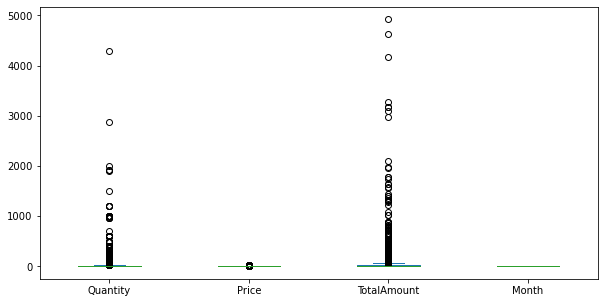

In [37]:
# Draw box plots for each numeric variable.


df2[['Quantity','Price','TotalAmount','Month']].plot(kind='box', figsize=(10,5))
plt.show()

# Identify and remove outliers

In [38]:
# This function returns the lower and upper bounds of a numeric input variable.

def calc_outliers(var):
    q3 = np.percentile(var, 75) 
    q1 = np.percentile(var, 25)

    iqr = 1.5 * (q3 - q1)

    lb = q1 - iqr
    ub = q3 + iqr

    print('Lower bound of outliers:', round(lb, 2), '\nUpper bound of outliers:', round(ub, 2))
    
    return lb, ub

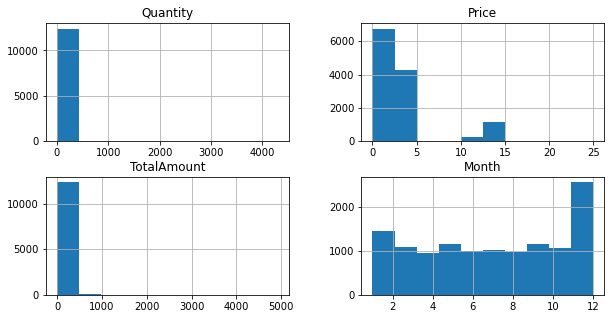

In [39]:
# Identify the shape of the data before removing outliers.

df2[['Quantity','Price','TotalAmount','Month']].hist(figsize=(10,5))
plt.show()

In [40]:
# Call the calc_outliers() function iteratively for each numeric variable.
# For each variable:
#     Remove the outliers that are higher than the upper bounds.
#     Remove the variables that are lower than the lower bounds.
# As you iterate through each variable, print the shape of the data after the outliers for that variable are removed.


calc_outliers(df2.Quantity)


Lower bound of outliers: -15.0 
Upper bound of outliers: 33.0


(-15.0, 33.0)

In [41]:
calc_outliers(df2.Price)

Lower bound of outliers: -3.3 
Upper bound of outliers: 9.9


(-3.3000000000000003, 9.9)

In [42]:
calc_outliers(df2.TotalAmount)

Lower bound of outliers: -23.8 
Upper bound of outliers: 66.07


(-23.805, 66.07499999999999)

# Save the final dataset as a pickle file

In [43]:
# Save the final dataset as a pickle file named online_history_cleaned_final.pickle.

df2.to_pickle("online_history_cleaned_final.pickle")